# <center> Pandemic Watching

In [1]:
#importing Libraries

import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import matplotlib.pyplot as plt
import requests
import json
from pprint import pprint
import numpy as np
import scipy.stats as st
from config import m_api_key
from config import t_api_key
greencolors = ['#90EE90','#41A317','#387C44','#4E8975']
bluecolors = ['#3B9C9C', '#82CAFF','#00CDE1','#357EC7']
orangecolors = ['#FBB917','#EAC117', '#FFF380', '#D4A017']
purplecolors = ['#F9966B','#F660AB', '#7D2252', '#E55451']


plt.rcParams['figure.figsize'] = [15,10]

ModuleNotFoundError: No module named 'config'

In [2]:
# Creating Dataframe of Netflix Movies  ( based out of www.flixable.com)
df = pd.read_csv('Resources/flixable_df.csv')
df.head()

,Unnamed: 0,date,link,title,description,href,rating
0,0,January 29,https://flixable.com/title/below-zero/,Below Zero,2021,https://www.imdb.com/title/tt4016994/?ref_=tt_...,7.5/10
1,1,January 29,https://flixable.com/title/finding-ohana/,Finding ‘Ohana,2021,https://www.imdb.com/title/tt10332588/?ref_=tt...,6.1/10
2,2,January 29,https://flixable.com/title/the-dig/,The Dig,2021,https://www.imdb.com/title/tt3661210/?ref_=tt_...,7.2/10
3,3,January 29,https://flixable.com/title/we-are-the-brooklyn...,We Are: The Brooklyn...,2021,https://www.imdb.com/title/tt3661210/?ref_=tt_...,7.2/10
4,4,January 28,https://flixable.com/title/june-kopi/,June & Kopi,2021,https://www.imdb.com/title/tt13728764/?ref_=tt...,6.8/10


In [3]:
#extracting list of movies released in 2019 and 2020 
m19_df = df.loc[df['description']==2019,:]
m20_df = df.loc[df['description']==2020,:]
movie19 = m19_df['title']
movie20 = m20_df['title']
print(f'Total number of movies in 2019 are {len(movie19)}')
print(f'Total number of movies in 2020 are {len(movie20)}')


Total number of movies in 2019 are 972
Total number of movies in 2020 are 877


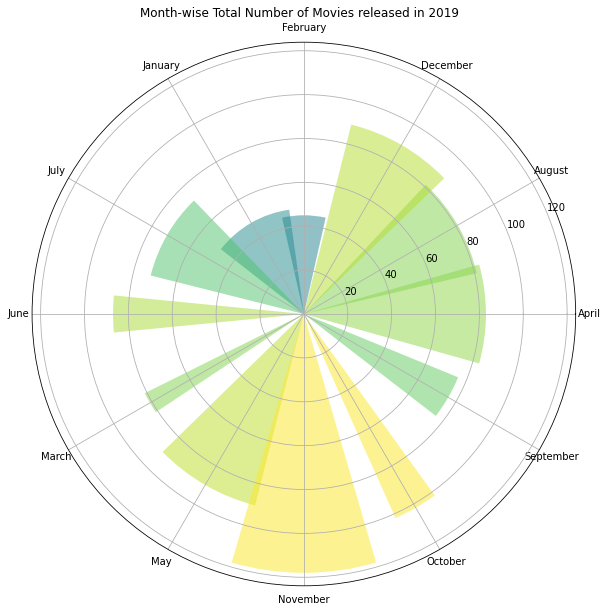

In [4]:
#---------------------------------NEW------------------------------
new_month= []
for month in m19_df['date']:
    new_month.append(month.split(' ')[0])
m19_df['month']=new_month
monthcount = m19_df.groupby('month').title.count()
np.random.seed(19680801)

# Compute pie slices
N = 12
m_c = np.linspace(0.0, 2 * np.pi, N, endpoint=False)
# radii = 10 * monthcount
width = np.pi / 4 *np.random.rand(N)
colors = plt.cm.viridis(monthcount / 100.)

ax = plt.subplot(111, projection='polar')
ax.bar(m_c, monthcount, width=width, bottom=0.0, joinstyle='round', color=colors,align='center', alpha=0.5, tick_label=monthcount.index)# = list(month_numbers.keys()))


plt.title('Month-wise Total Number of Movies released in 2019  ')
plt.show()

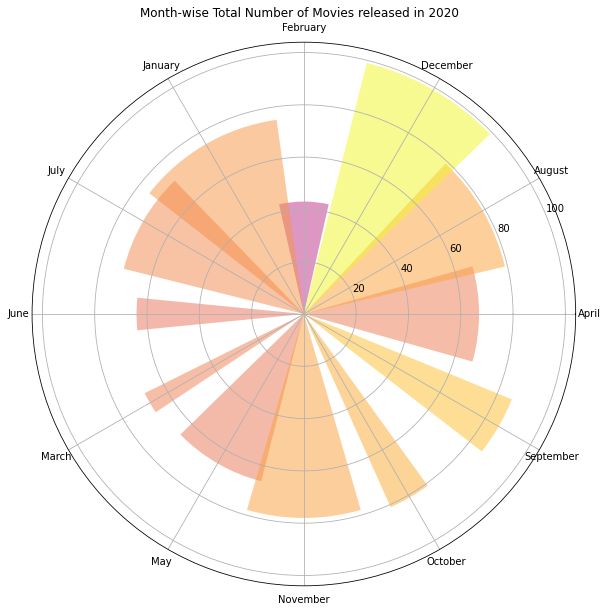

In [5]:
#---------------------------------NEW------------------------------
new_month= []
for month in m20_df['date']:
    new_month.append(month.split(' ')[0])
m20_df['month']=new_month
monthcount = m20_df.groupby('month').title.count()
np.random.seed(19680801)

# Compute pie slices
N = 12
m_c = np.linspace(0.0, 2 * np.pi, N, endpoint=False)
width = np.pi / 4 *np.random.rand(N)
colors = plt.cm.plasma(monthcount / 100.)

ax = plt.subplot(111, projection='polar')
ax.bar(m_c, monthcount, width=width, bottom=0.0, joinstyle='round', color=colors,align='center', alpha=0.5, tick_label=monthcount.index)# = list(month_numbers.keys()))


plt.title('Month-wise Total Number of Movies released in 2020  ')
plt.show()

### Creating functions 

In [6]:
def movie_id(movie_list):
    tmdb_df = pd.read_json('Resources/movie_ids_02_01_2021.json',lines = True)
    tmdb_df.rename(columns = {'original_title': 'title'},inplace = True)
    tmdb_df.set_index('title')
    id_df = pd.merge(tmdb_df, movie_list, how='inner', on = 'title')
    imdb_id = []
    name = []
    revenue = []
    c= 0
    for ids in id_df['id']:
        try:
            
            target_url = f'https://api.themoviedb.org/3/movie/{ids}?api_key={t_api_key}'
            response = requests.get(target_url)
            data = response.json()
    #         pprint(data)
            imdb_id.append(data['imdb_id'])
            name.append(data['title'])
            revenue.append(data['revenue'])
            print(f'Revenue found for tmdb id {ids}')
            c+=1
        except:
            print(f'No revenue data found for tmdb id {ids} ')

    revenue_df  = pd.DataFrame({'Title': name, 'MovieID': imdb_id, 'revenue':revenue})
    print(f'----------------------------------------------------------------------------\n Revenue Data extracted successfully for {c} movies\n----------------------------------------------------------------------------')
    return (revenue_df)
            


def fetch_db (movies):
    title = []
    genre = []
    lang = []
    idx = []
    irating = []
    ivotes = []
    year = []
    count = 0
    print('--------------------------------------\nExtracting Data from OMDB\n--------------------------------------')
    for each_movie in movies:
        url = f"http://www.omdbapi.com/?t={each_movie}&apikey={m_api_key}" 
#         print(each_movie)
#         print(url)
        try:

            response = requests.get(url)
#             print(response)
            data = response.json()
            title.append(data['Title'])
            ivotes.append(data['imdbVotes'])
            irating.append(data['imdbRating'])
            idx.append(data['imdbID'])
            genre.append(data['Genre'].split(','))
            print(f'Movie: {each_movie} check')
        except:
            print(f'Movie: {each_movie}  details not found')
            count+=1
   
    movie_df = pd.DataFrame({'MovieID':idx, 'Title': title, 'Votes':ivotes, 'Rating': irating, 'Genre': genre})
    print(f'--------------------------------------\nTotal Movies in the Database  :  {len(movie_df)}      \n--------------------------------------\nTotal Missing Movies  :  {count}      \n--------------------------------------')

    return(movie_df)


def outlier(df,col):
    q1 = np.quantile(df[col],0.25) 
    q3 = np.quantile(df[col],0.75)
    IQR = q3 - q1
    upbound = q3+(1.5* IQR)
    lowbound = q1-(1.5*IQR)
    fig1, ax1 = plt.subplots()
    ax1.boxplot(df[col],  sym = 'r', showmeans = True)
    plt.title(f' Plot highlighting outliers in the {col} data ')
    plt.show()   

    #dropping the outliers
    for idx, srs in df.iterrows():
        if srs[col]<lowbound:
            df = df.drop(index = idx)
        if srs[col]>upbound:
            df = df.drop(index = idx)
    plt.show() 
    print(f'---------------------- After dropping Outliers----------------------')
    print(f'-----------------------Final Data Points = {len(df)}----------------------')
    df.hist()
    plt.show() 
    

def regress(x,y,nx,ny):
    slope, inter, r, p, std = st.linregress(x,y)
    y_pred = slope*x +inter
    plt.plot(x,y_pred, c='r')
    print(f'r is {r} and p is {p}')
    plt.annotate(f'y = {round(slope,4)}x + {round(inter,2)} ', (nx,ny), c= 'r',fontsize = 10)
    plt.show()
    
def rating_votes(df, gen1):
    v_count=0
    r_count=0
    rev_count = 0
    new_r_gen = []
    new_r_gen = gen1
    new_r_gen
    for genre in gen1['Genre']:
        for idx , srs in df.iterrows():
            for g in srs['Genre']:
                if g == genre:
                    v_count+=srs['Votes']/100000
                    r_count+=srs['Rating']
        new_r_gen.loc[new_r_gen['Genre'] == genre,'Votes']=v_count
        new_r_gen.loc[new_r_gen['Genre'] == genre,'Rating']= r_count
        
        v_count=0
        r_count=0
    return(new_r_gen)
        
    
    
    
    
def genre_revenue(df,gen2):
    rev_count = 0
    for genre in gen2['Genre']:
        for idx , srs in df.iterrows():
            for g in srs['Genre']:
                if g == genre:
                    rev_count +=float(srs['revenue'])
        gen2.loc[gen2['Genre']==genre,'revenue']= rev_count/1000000
        rev_count = 0
    return(gen2)




# 2019 movies Database

In [7]:
movie19

13                    Hire a Woman
14                          She Is
18        Demon Slayer: Kimetsu...
45      Pinkfong & Baby Shark's...
55                       Al acecho
                   ...            
3535    ReMastered: Massacre at...
3537                The Last Laugh
3553    A Series of Unfortunate...
3555        COMEDIANS of the world
3562      Tidying Up with Marie...
Name: title, Length: 972, dtype: object

In [8]:
#calling all the 2019 movies on Netflix by pinging the OMDB API
movie19_df = fetch_db(movie19)

--------------------------------------
Extracting Data from OMDB
--------------------------------------
Movie: Hire a Woman check
Movie: She Is check
Movie: Demon Slayer: Kimetsu... check
Movie: Pinkfong & Baby Shark's... check
Movie: Al acecho check
Movie: L.A.’s Finest  details not found
Movie: QB1: Beyond the Lights check
Movie: The Creative Brain check
Movie: Too Handsome to Handle check
Movie: Dare Me check
Movie: Sakho & Mangane check
Movie: Isa Pa with Feelings check
Movie: Bridezilla check
Movie: Hello, Love, Goodbye check
Movie: Mohamed Hussein  details not found
Movie: Diamond City check
Movie: Jeopardy! check
Movie: Eggnoid: Love & Time... check
Movie: Sakaling Maging Tayo check
Movie: The Wedding Shaman  details not found
Movie: The Professor and the... check
Movie: The Panti Sisters check
Movie: Kalel, 15 check
Movie: Once Upon a Time check
Movie: Juman check
Movie: Between Maybes check
Movie: Rust Creek check
Movie: Spookley and the... check
Movie: 40 Sticks check
Movie: 

Movie: The Last Bomb of the...  details not found
Movie: Uncovered  details not found
Movie: Bhangra Paa Le  details not found
Movie: Calico Critters...  details not found
Movie: ZZ TOP: THAT LITTLE OL'...  details not found
Movie: Always a Witch  details not found
Movie: Amit Tandon: Family...  details not found
Movie: Toy Boy  details not found
Movie: Pokémon: Mewtwo Strikes...  details not found
Movie: The Angry Birds Movie 2  details not found
Movie: Every Time I Die  details not found
Movie: Full Count  details not found
Movie: Girl on the Third Floor  details not found
Movie: The Body  details not found
Movie: Love Dot Com: The...  details not found
Movie: Miss Virginia  details not found
Movie: Cuddle Weather  details not found
Movie: Panipat - The Great...  details not found
Movie: Dragon Quest Your Story  details not found
Movie: Palazuelos mi rey  details not found
Movie: Sleepless Society...  details not found
Movie: Love for Sale 2  details not found
Movie: Polaroid  detail

Movie: Put Your Head on My...  details not found
Movie: To Be of Service  details not found
Movie: Little Things  details not found
Movie: Greatest Events of WWII...  details not found
Movie: Green Eggs and Ham  details not found
Movie: Let It Snow  details not found
Movie: Paradise Beach  details not found
Movie: Wild District  details not found
Movie: Burning Cane  details not found
Movie: SCAMS  details not found
Movie: Luccas Neto in: Summer...  details not found
Movie: Millennials  details not found
Movie: Seth Meyers: Lobby Baby  details not found
Movie: The End of the F***ing...  details not found
Movie: Tune in for Love  details not found
Movie: Undercover Brother 2  details not found
Movie: Voice  details not found
Movie: Oththa Seruppu Size 7  details not found
Movie: The Devil Next Door  details not found
Movie: A Remarkable Tale  details not found
Movie: American Son  details not found
Movie: Atypical  details not found
Movie: Drive  details not found
Movie: Fire in Paradis

Movie: Falling Inn Love  details not found
Movie: Kardec  details not found
Movie: Droppin' Cash: Los Angeles  details not found
Movie: Travis Scott: Look Mom...  details not found
Movie: Million Pound Menu  details not found
Movie: Dave Chappelle: Sticks...  details not found
Movie: 13 Reasons Why: Beyond...  details not found
Movie: HERO MASK  details not found
Movie: Kaake Da Viyah  details not found
Movie: Mayday Life  details not found
Movie: Saavat  details not found
Movie: Love Alarm  details not found
Movie: American Factory  details not found
Movie: Game Over (Hindi Version)  details not found
Movie: Game Over (Tamil Version)  details not found
Movie: Game Over (Telugu Version)  details not found
Movie: Hyperdrive  details not found
Movie: Our Planet - Behind The...  details not found
Movie: Simon Amstell: Set Free  details not found
Movie: 45 rpm  details not found
Movie: Apache: The Life of...  details not found
Movie: Better Than Us  details not found
Movie: Diagnosis  deta

Movie: Prince of Peoria  details not found
Movie: 1994  details not found
Movie: It's Bruno!  details not found
Movie: Maria  details not found
Movie: ReMastered: The Lion's...  details not found
Movie: Saverio Raimondo: Il...  details not found
Movie: See You Yesterday  details not found
Movie: White Gold  details not found
Movie: Good Sam  details not found
Movie: PATRICK (2019)  details not found
Movie: I Hear You  details not found
Movie: Backdraft 2  details not found
Movie: Still LAUGH-IN: The...  details not found
Movie: Malibu Rescue  details not found
Movie: The Defected  details not found
Movie: Shéhérazade  details not found
Movie: Easy  details not found
Movie: Jailbirds  details not found
Movie: The Mechanism  details not found
Movie: The Society  details not found
Movie: Wine Country  details not found
Movie: Abyss  details not found
Movie: I Have a Script  details not found
Movie: In the Bosom of a Thorn  details not found
Movie: The Writer  details not found
Movie: What

In [9]:
movie19_df.to_csv('Output/Movies_2019') ## saving in csv for future use

In [10]:
revenue19_df = movie_id(movie19)

Revenue found for tmdb id 187
Revenue found for tmdb id 742121
Revenue found for tmdb id 327
Revenue found for tmdb id 173274
Revenue found for tmdb id 356501
Revenue found for tmdb id 524114
Revenue found for tmdb id 681960
Revenue found for tmdb id 720122
Revenue found for tmdb id 754869
Revenue found for tmdb id 441
Revenue found for tmdb id 300972
Revenue found for tmdb id 576692
Revenue found for tmdb id 624841
Revenue found for tmdb id 797
Revenue found for tmdb id 659481
Revenue found for tmdb id 667999
Revenue found for tmdb id 675776
Revenue found for tmdb id 741572
Revenue found for tmdb id 1976
Revenue found for tmdb id 576704
Revenue found for tmdb id 688034
Revenue found for tmdb id 2157
Revenue found for tmdb id 577902
Revenue found for tmdb id 620244
Revenue found for tmdb id 2291
Revenue found for tmdb id 456529
Revenue found for tmdb id 457394
Revenue found for tmdb id 3113
Revenue found for tmdb id 170173
Revenue found for tmdb id 518671
Revenue found for tmdb id 4232

Revenue found for tmdb id 494379
Revenue found for tmdb id 495511
Revenue found for tmdb id 557307
Revenue found for tmdb id 557372
Revenue found for tmdb id 663191
Revenue found for tmdb id 670752
Revenue found for tmdb id 674801
Revenue found for tmdb id 689255
Revenue found for tmdb id 690814
Revenue found for tmdb id 715367
Revenue found for tmdb id 742691
Revenue found for tmdb id 759649
Revenue found for tmdb id 38920
Revenue found for tmdb id 107781
Revenue found for tmdb id 168534
Revenue found for tmdb id 706305
Revenue found for tmdb id 39172
Revenue found for tmdb id 117705
Revenue found for tmdb id 118612
Revenue found for tmdb id 163733
Revenue found for tmdb id 273488
Revenue found for tmdb id 300504
Revenue found for tmdb id 423904
Revenue found for tmdb id 520185
Revenue found for tmdb id 537915
Revenue found for tmdb id 650657
Revenue found for tmdb id 41266
Revenue found for tmdb id 47945
Revenue found for tmdb id 49437
Revenue found for tmdb id 183292
Revenue found f

Revenue found for tmdb id 589362
Revenue found for tmdb id 644409
Revenue found for tmdb id 654042
Revenue found for tmdb id 709429
Revenue found for tmdb id 764199
Revenue found for tmdb id 108256
Revenue found for tmdb id 602609
Revenue found for tmdb id 109841
Revenue found for tmdb id 478258
Revenue found for tmdb id 112205
Revenue found for tmdb id 231384
Revenue found for tmdb id 403693
Revenue found for tmdb id 406561
Revenue found for tmdb id 444500
Revenue found for tmdb id 602766
Revenue found for tmdb id 114750
Revenue found for tmdb id 135094
Revenue found for tmdb id 148824
Revenue found for tmdb id 148857
Revenue found for tmdb id 215497
Revenue found for tmdb id 460321
Revenue found for tmdb id 604824
Revenue found for tmdb id 636967
Revenue found for tmdb id 160808
Revenue found for tmdb id 472052
Revenue found for tmdb id 179587
Revenue found for tmdb id 572152
Revenue found for tmdb id 778681
Revenue found for tmdb id 179614
Revenue found for tmdb id 597233
Revenue fo

Revenue found for tmdb id 492188
Revenue found for tmdb id 743770
Revenue found for tmdb id 500682
Revenue found for tmdb id 519129
Revenue found for tmdb id 504859
Revenue found for tmdb id 567392
Revenue found for tmdb id 505929
Revenue found for tmdb id 505948
Revenue found for tmdb id 508965
Revenue found for tmdb id 509865
Revenue found for tmdb id 509967
Revenue found for tmdb id 510498
Revenue found for tmdb id 512959
Revenue found for tmdb id 513083
Revenue found for tmdb id 513409
Revenue found for tmdb id 514999
Revenue found for tmdb id 515248
Revenue found for tmdb id 515743
Revenue found for tmdb id 519674
Revenue found for tmdb id 520901
Revenue found for tmdb id 523139
Revenue found for tmdb id 525183
Revenue found for tmdb id 525235
Revenue found for tmdb id 528493
Revenue found for tmdb id 528888
Revenue found for tmdb id 528985
Revenue found for tmdb id 789986
Revenue found for tmdb id 529962
Revenue found for tmdb id 531033
Revenue found for tmdb id 531306
Revenue fo

In [13]:
revenue19_df.to_csv('Output/MovieRevenue_2019.csv')

In [14]:
#joining the revenue dataframe with the genre dataframe based on movie title and imdb ID
rev19_db = pd.merge(movie19_df,revenue19_df,how = 'inner', on = ['Title','MovieID'])
revenue19_df.set_index('Title')
revenue19_df.head(100)
# a small smaple of data is present which has information on revenue. But the sample size is suffiecient for representing the data
rev19_db = rev19_db[rev19_db['revenue']!=0]
print(len(rev19_db))


9


In [15]:
rev19_db.dtypes #ensuring the revenue is stored as a numeric

MovieID    object
Title      object
Votes      object
Rating     object
Genre      object
revenue     int64
dtype: object

In [16]:
revenue19_df

,Title,MovieID,revenue
0,Sin City,tt0401792,158733820
1,Sin City,None,0
2,Brother,tt0222851,15250000
3,Brother,tt0245024,0
4,Brother,,0
...,...,...,...
970,Zulu Man in Japan,None,0
971,One Day at a Time,tt0675272,0
972,The Witcher,None,0
973,Chambers,None,0


In [17]:
movie19_db = movie19_df
# cleaning up the data
movie19_db['Votes'].replace(',','', regex=True, inplace=True)
movie19_db['Rating'].replace(',','', regex=True, inplace=True)
# remove commas from votes and ratings
movie19_db['Votes'] = movie19_db['Votes'].apply(pd.to_numeric, downcast='float', errors='coerce')
movie19_db['Rating'] = movie19_db['Rating'].apply(pd.to_numeric, downcast='float', errors='coerce')
# convert to float for numeric calculation

In [18]:
movie19_db.dtypes

MovieID     object
Title       object
Votes      float64
Rating     float64
Genre       object
dtype: object

In [19]:
#Dropping rows with null value
movie19_db.dropna(inplace=True)
len(movie19_db) # total value = 871

129

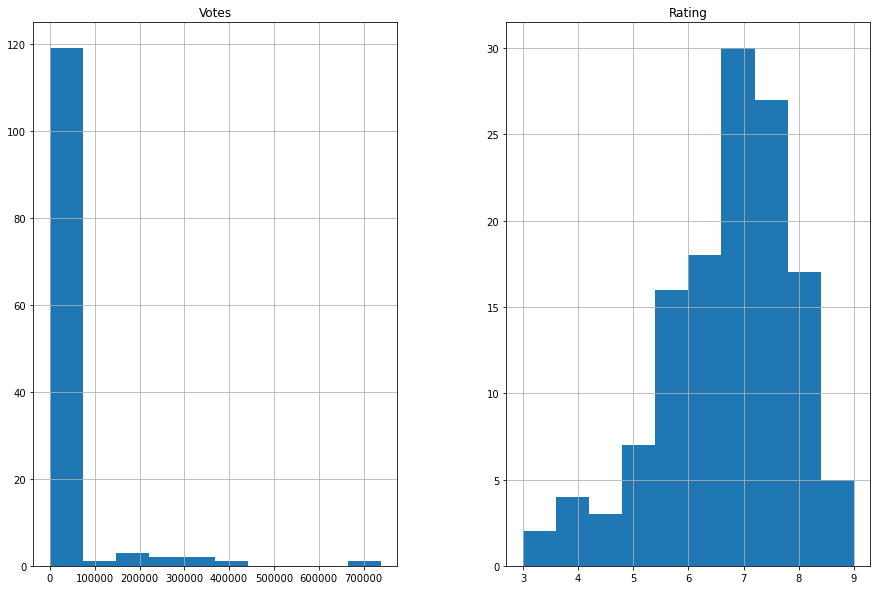

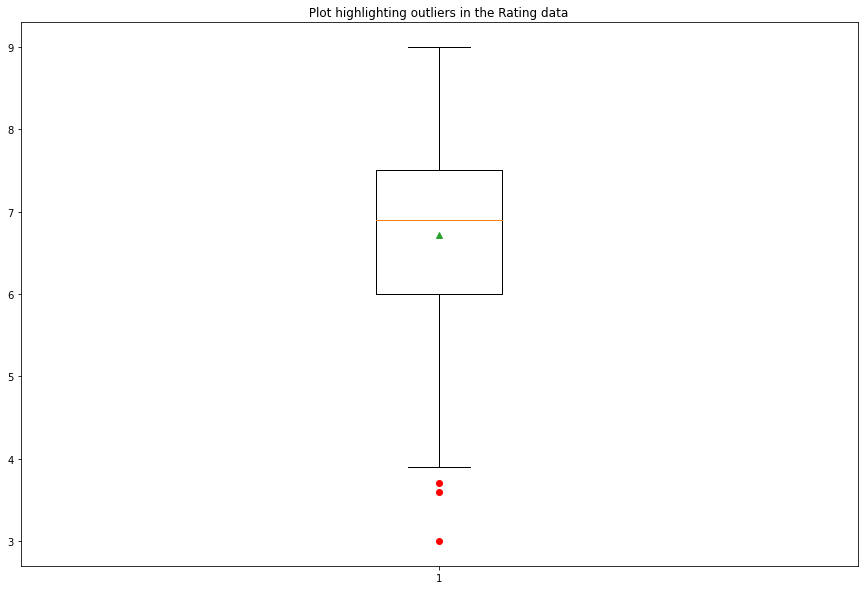

---------------------- After dropping Outliers----------------------
-----------------------Final Data Points = 126----------------------


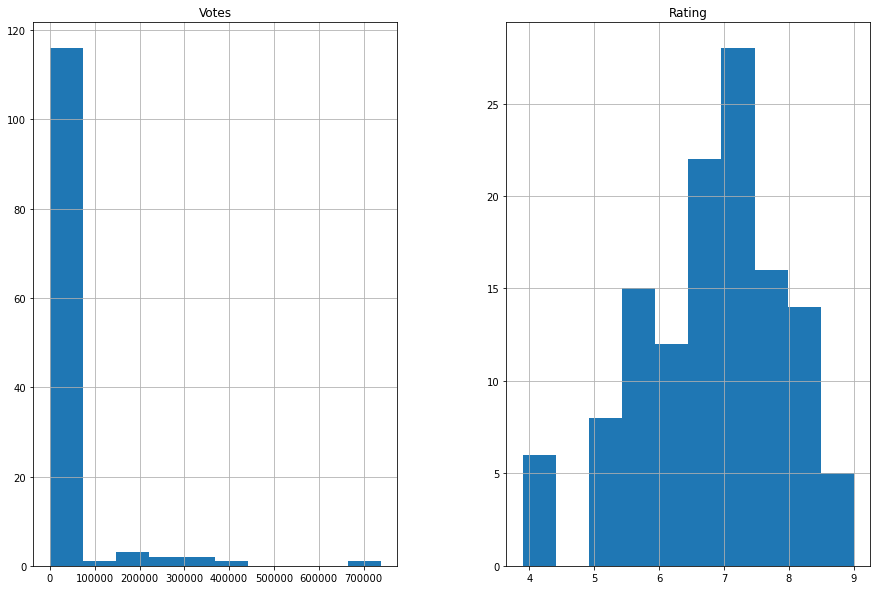

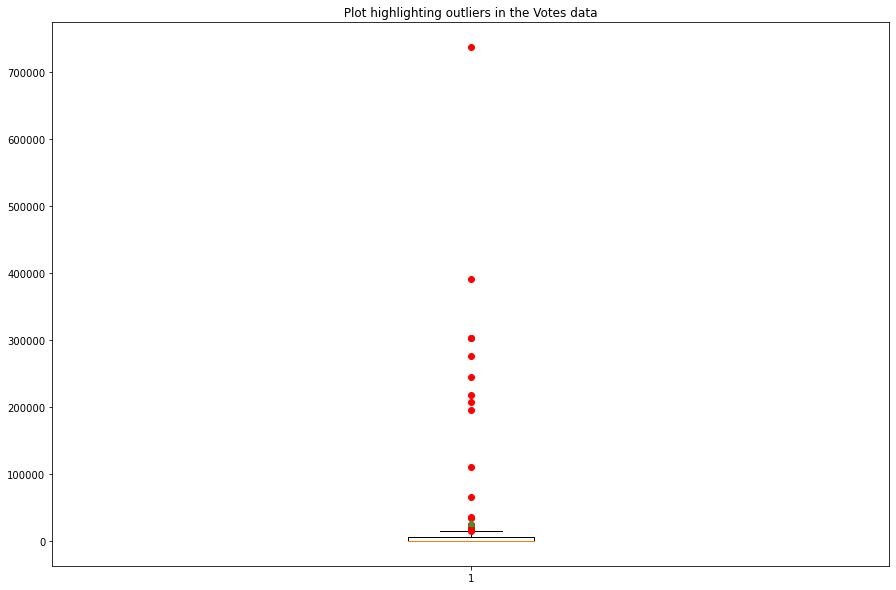

---------------------- After dropping Outliers----------------------
-----------------------Final Data Points = 106----------------------


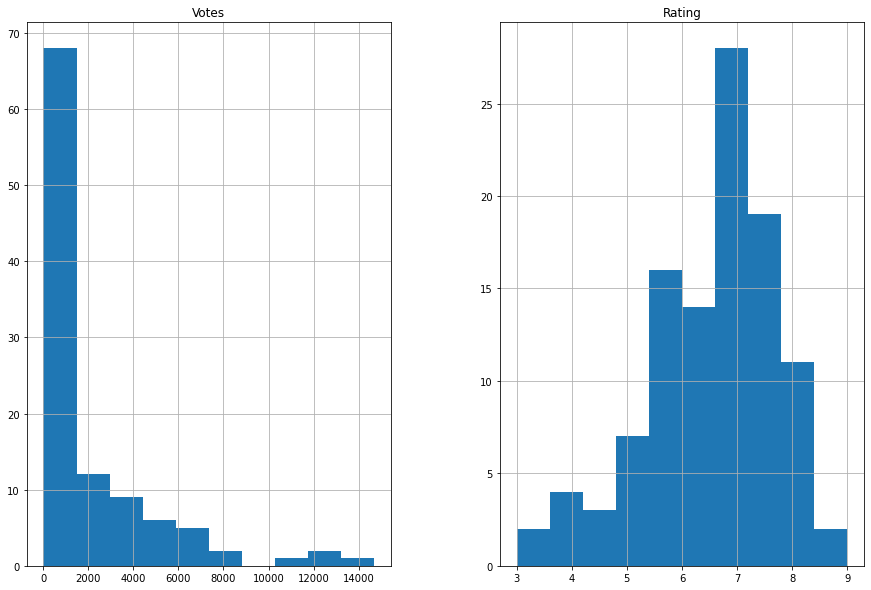

In [20]:
# understanding the Movie Ratings and Votes Data
#Shape of data
movie19_db.hist()

# Identifying and removing Outliers from Ratings
outlier(movie19_db, 'Rating')
outlier(movie19_db, 'Votes')
    
# movie ratings are now somewhat normally distributed   

In [21]:
new_genre = []
for i in movie19_db['Genre']:
    for j in i:
        new_genre.append(j.strip())
genre19_list = np.unique(new_genre)
genre19_list.sort()
genre19_list
genre19_df = pd.DataFrame({'Genre':genre19_list})
genre19_df
# row #17 list N/A as a Genre which needs to be removed
genre19_df = genre19_df.drop(index=genre19_df.loc[(genre19_df['Genre']=='N/A')].index)
r_genre19_df = genre19_df.copy() #extra copy
genre19_df


,Genre
0,Action
1,Adventure
2,Animation
3,Biography
4,Comedy
5,Crime
6,Documentary
7,Drama
8,Family
9,Fantasy


In [22]:
rev19_db

,MovieID,Title,Votes,Rating,Genre,revenue
2,tt10156112,"Hello, Love, Goodbye",785,7.3,"[Drama, Romance]",16800000
4,tt10637682,The Panti Sisters,194,5.5,[Comedy],8727994
14,tt0219822,Human Nature,"17,500",6.4,"[Comedy, Drama]",1600000
17,tt0338526,Van Helsing,"244,301",6.1,"[Action, Adventure, Fantasy]",300257475
24,tt0401792,Sin City,"737,973",8.0,"[Crime, Thriller]",158733820
25,tt6852872,Elizabeth Harvest,"6,810",5.8,"[Horror, Sci-Fi, Thriller]",4973
40,tt6428150,High Strung Free Dance,"1,281",6.8,"[Music, Romance]",235066
41,tt5727208,Uncut Gems,"218,564",7.4,"[Crime, Drama, Thriller]",50020902
43,tt0077504,The End,"3,599",6.2,"[Comedy, Drama]",45000000


<AxesSubplot:xlabel='Genre'>

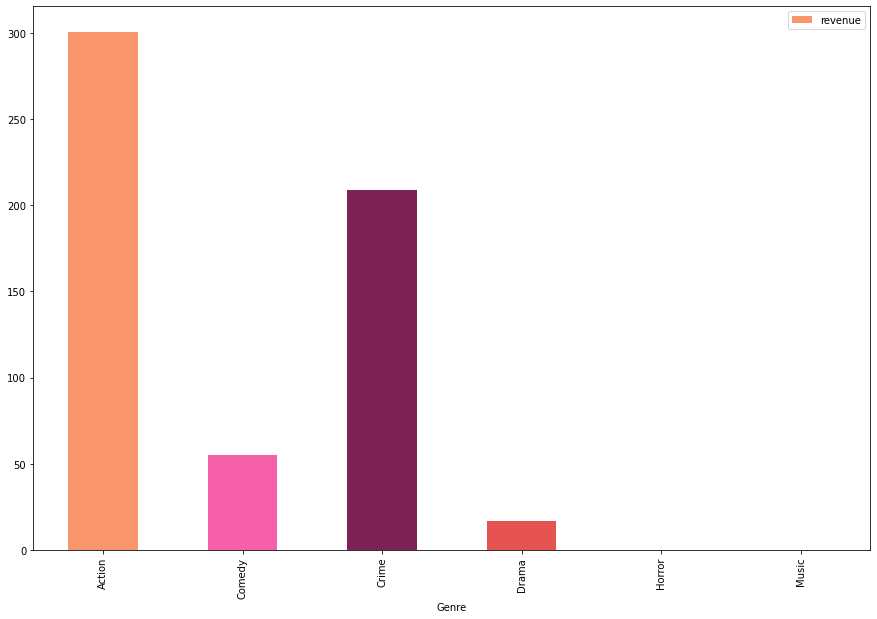

In [23]:
final19_rev_df = genre_revenue(rev19_db,genre19_df)
final19_rev_df
colors = plt.cm.plasma
final19_rev_df.drop(index =(final19_rev_df.loc[final19_rev_df['revenue']==0,:]).index, inplace = True) # removing genres which did not have revenue details
final19_rev_df.plot('Genre','revenue',color = purplecolors, kind = 'bar')# revenue in millions

In [24]:
rating_votes(movie19_db, r_genre19_df)
r_genre19_df.drop(index =(r_genre19_df.loc[r_genre19_df['Votes']==0,:]).index, inplace = True)
r_genre19_df

,Genre,Votes,Rating
0,Action,10.57839,66.400000
1,Adventure,2.07986,7.700000
2,Animation,0.74009,104.300000
3,Biography,0.48445,20.800000
4,Comedy,0.55667,134.100000
5,Crime,12.10774,72.500000
6,Documentary,0.12582,115.000001
7,Drama,8.30903,206.200001
8,Family,0.01162,4.400000
10,Game-Show,0.08747,16.599999


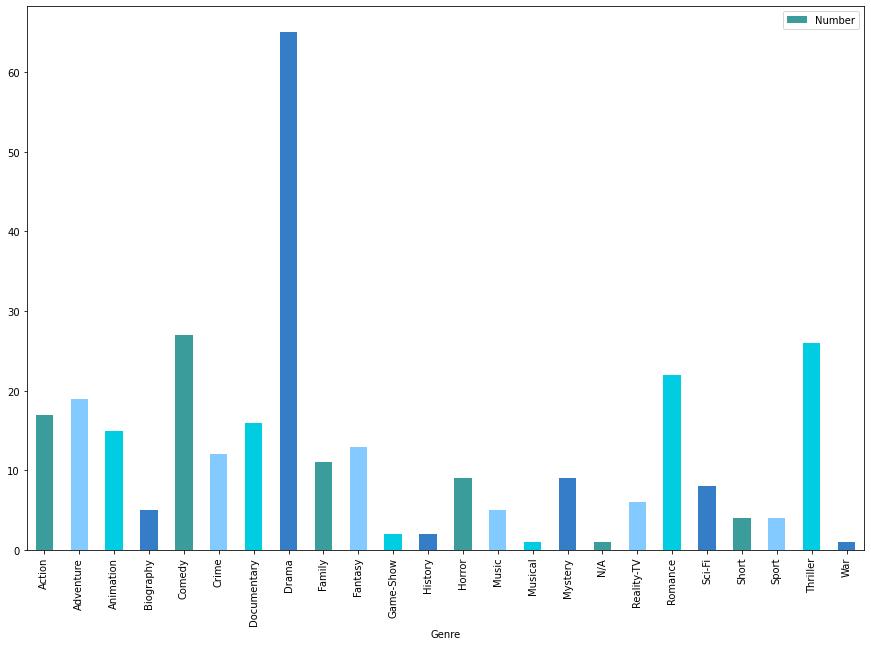

In [25]:
#identifying the number of movies in each genre
matrix = pd.get_dummies((movie19_db['Genre'].apply(pd.Series).stack()).str.strip()).sum(level = 0)

total19 = pd.DataFrame(matrix.sum())
total19['Genre']= total19.index
total19.set_index(np.arange(len(total19)))
total19.rename(columns = {0: 'Number'}, inplace = True)
total19.plot('Genre','Number', color = bluecolors,  kind = 'bar')

plt.show()


### this plot shows that maximum number of movies were released in Drama Genre followed by comedy

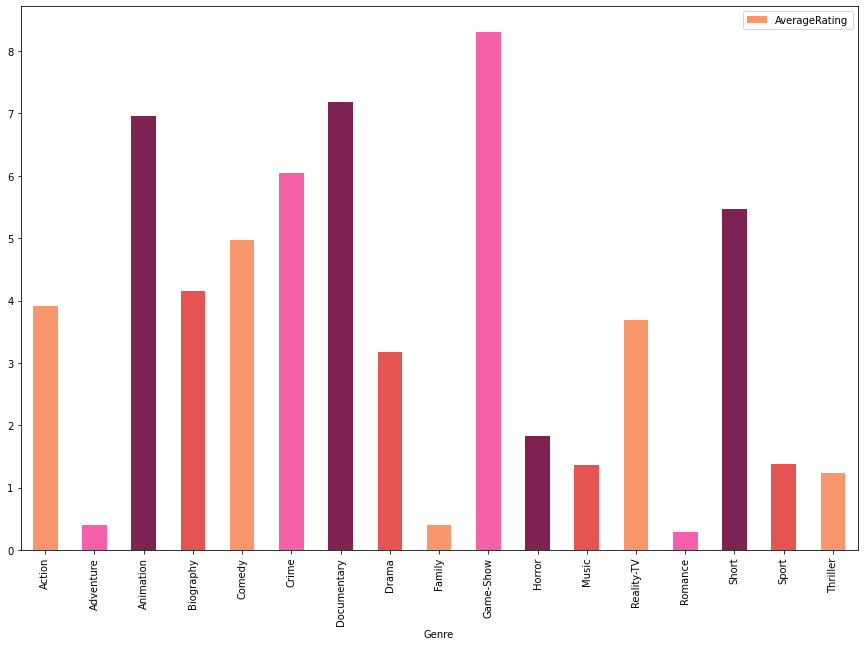

In [26]:
new_genre19 = pd.merge(r_genre19_df,total19,how='inner',on ='Genre')
new_genre19['AverageRating']= new_genre19['Rating']/new_genre19['Number']
new_genre19.plot('Genre','AverageRating' , color = purplecolors
                 , kind = 'bar')

plt.show()

### this plot shows that Documentary, Game-show and Animation received the highest average ratings

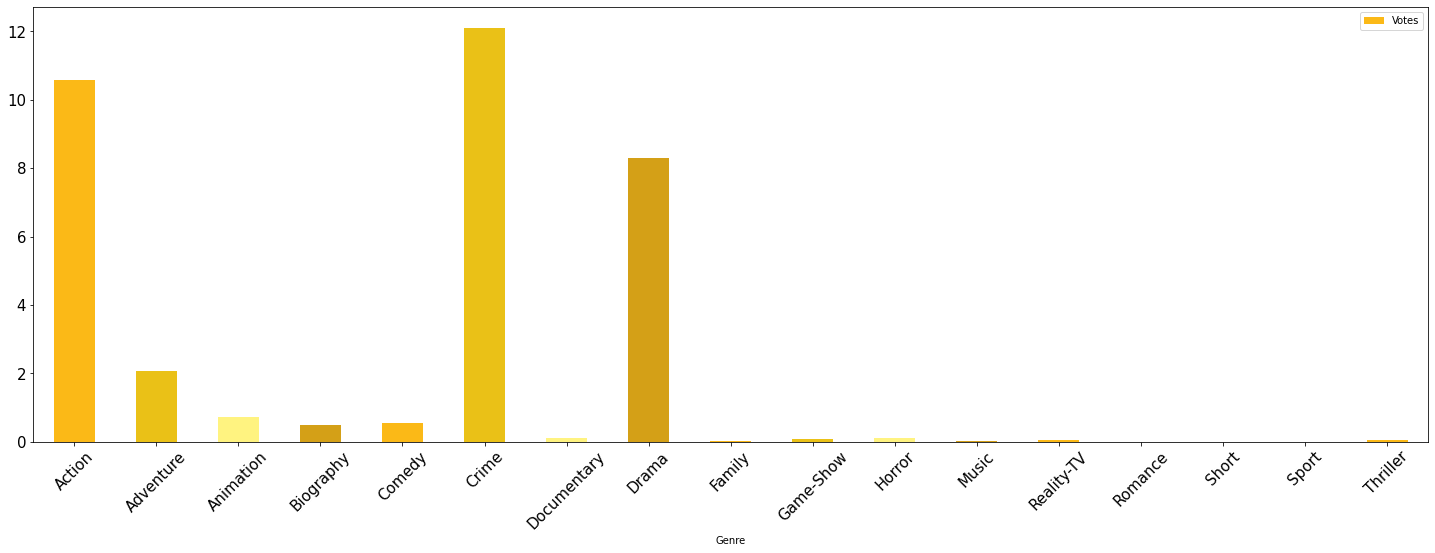

In [27]:
# Genre VS Votes Plot - 2019
new_genre19.plot('Genre', 'Votes',color = orangecolors, rot = 45, kind = 'bar', figsize = (25,8), fontsize = 15)
plt.show()


###  <jusitfy> The plot shows that for the year 2019, ACTION followed by DRAMA was the most voted Genre. The number of votes may also be treated as an indirect indicator of the number of views of a given genre, as the data for exact number of views is not freely available.
### Keeping this in mind, one can safely say that 'ACTION' was the most viewed genre of 2019

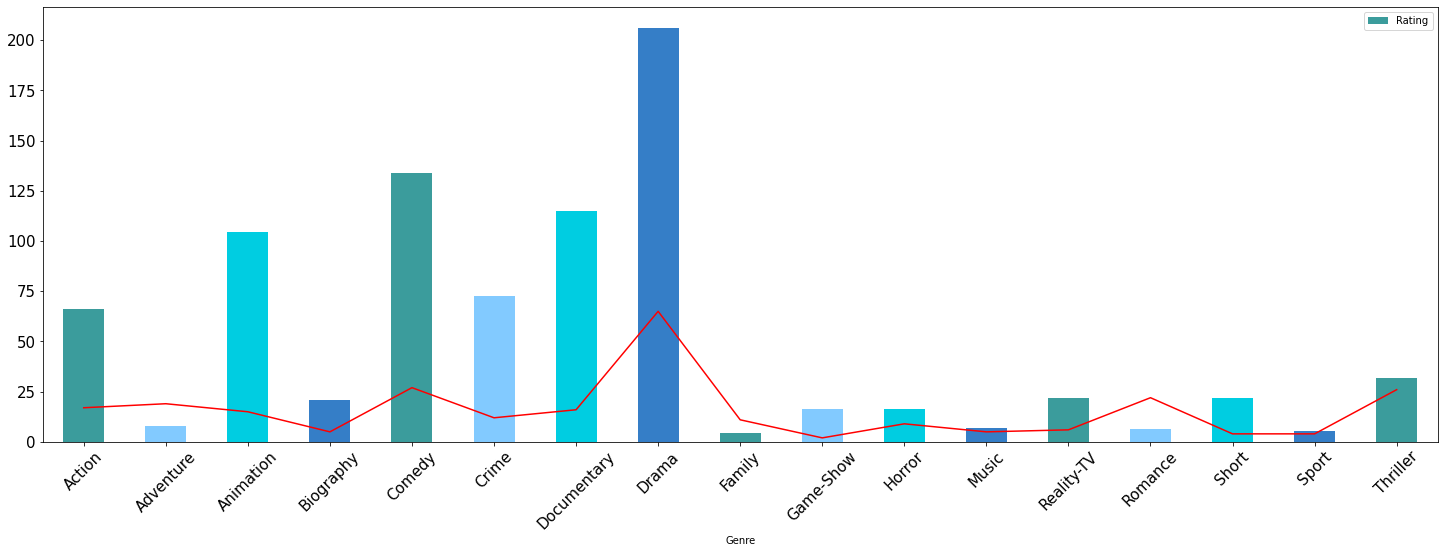

In [28]:
new_genre19.plot('Genre', 'Rating', rot = 45, kind = 'bar', color = bluecolors, figsize = (25,8), fontsize = 15)
plt.plot(new_genre19['Genre'],new_genre19['Number'], c = 'r')#line showing total number of movies in each genre
plt.show()

### The plot shows that for the year 2019, comedy was the highest total rated Genre. The ratings of the genre may also be treated as an indirect indicator of the number of views of a given genre, as the data for exact number of views is not freely available.
### Keeping this in mind, one can safely say that 'Comedy' was the most loved genre of 2019

r is 0.4558542458749112 and p is 0.06591351087924158


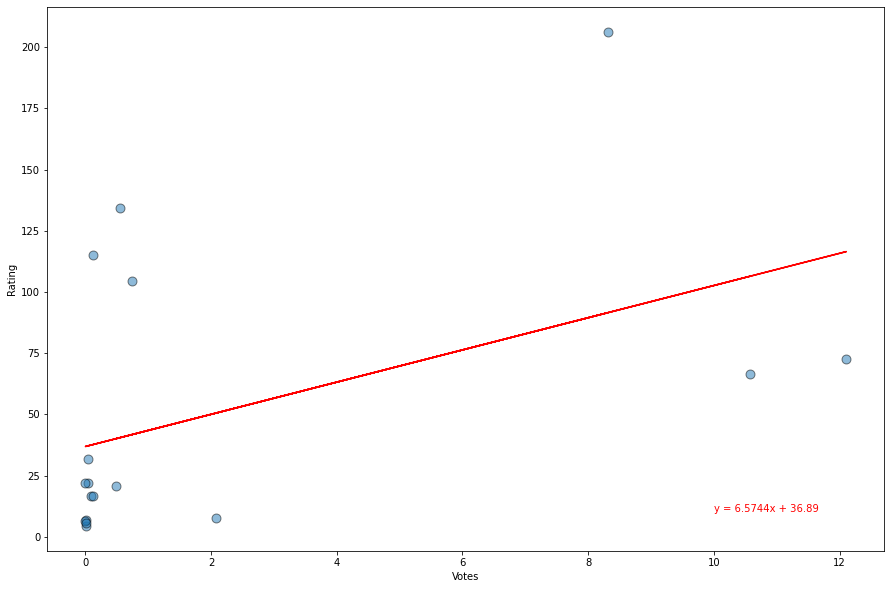

In [29]:
new_genre19.plot.scatter('Votes','Rating',  s = 80, figsize = (15,10), edgecolor = 'black', alpha = 0.5, fontsize = 10)
x = new_genre19['Votes']
y = new_genre19['Rating']
nx = 10
ny = 10
regress(x,y, nx, ny)



# 2020 Movies Database


In [30]:

movie20_df = fetch_db(movie20)


--------------------------------------
Extracting Data from OMDB
--------------------------------------
Movie: Accomplice  details not found
Movie: Kilometers and Kilometers  details not found
Movie: So My Grandma’s a Lesbian!  details not found
Movie: Friendsgiving  details not found
Movie: The Shadow of Violence  details not found
Movie: Cut Throat City  details not found
Movie: Sightless  details not found
Movie: Death of Me  details not found
Movie: Double Dad  details not found
Movie: The Magicians  details not found
Movie: The Vanished  details not found
Movie: The Heartbreak Club  details not found
Movie: Last Tango in Halifax  details not found
Movie: 100% Halal  details not found
Movie: Pieces of a Woman  details not found
Movie: Tony Parker: The Final...  details not found
Movie: Korean Pork Belly Rhapsody  details not found
Movie: Asphalt Burning  details not found
Movie: Full Out 2: You Got This!  details not found
Movie: Running Man  details not found
Movie: Best of Stand-

Movie: Miss India  details not found
Movie: Felix Lobrecht: Hype  details not found
Movie: MOTHER  details not found
Movie: Ya no estoy aquí: Una...  details not found
Movie: Can You Hear Me?  details not found
Movie: Elf Pets: A Fox Cub’s...  details not found
Movie: Elf Pets: Santa’s...  details not found
Movie: LEGO Ninjago  details not found
Movie: The Good Detective  details not found
Movie: Wheels of Fortune  details not found
Movie: His House  details not found
Movie: Kaali Khuhi  details not found
Movie: Kongsuni and Friends  details not found
Movie: Marvel's Agents of...  details not found
Movie: Rogue City  details not found
Movie: Somebody Feed Phil  details not found
Movie: Suburra: Blood on Rome  details not found
Movie: The Day of the Lord  details not found
Movie: Holidate  details not found
Movie: Nobody Sleeps in the...  details not found
Movie: Secrets of the Saqqara...  details not found
Movie: Blood of Zeus  details not found
Movie: Chico Bon Bon: Monkey...  details

Movie: Rising Phoenix  details not found
Movie: Emily's Wonder Lab  details not found
Movie: Trinkets  details not found
Movie: Bunk'd  details not found
Movie: The Creative Indians  details not found
Movie: Alien TV  details not found
Movie: Class of '83  details not found
Movie: Dark Forces  details not found
Movie: Hoops  details not found
Movie: Lucifer  details not found
Movie: Rust Valley Restorers  details not found
Movie: The Sleepover  details not found
Movie: Biohackers  details not found
Movie: Goedam  details not found
Movie: John Was Trying to...  details not found
Movie: The Crimes That Bind  details not found
Movie: DeMarcus Family Rules  details not found
Movie: High Score  details not found
Movie: Little Singham: Kaal Ka...  details not found
Movie: Crazy Awesome Teachers  details not found
Movie: Glitch Techs  details not found
Movie: Stranger  details not found
Movie: Bread Barbershop  details not found
Movie: Rita  details not found
Movie: 3%  details not found
Movi

Movie: Queer Eye  details not found
Movie: The Last Days of...  details not found
Movie: BAKI  details not found
Movie: Spelling the Dream  details not found
Movie: True: Rainbow Rescue  details not found
Movie: Chippa  details not found
Movie: Kenny Sebastian: The...  details not found
Movie: Space Force  details not found
Movie: Dorohedoro  details not found
Movie: Intuition  details not found
Movie: Jeffrey Epstein: Filthy...  details not found
Movie: Hannah Gadsby: Douglas  details not found
Movie: Norm of the North...  details not found
Movie: Betaal  details not found
Movie: One Day We'll Talk...  details not found
Movie: Si Doel the Movie 3  details not found
Movie: Control Z  details not found
Movie: History 101  details not found
Movie: The Lovebirds  details not found
Movie: Trailer Park Boys: The...  details not found
Movie: Mystic Pop-up Bar  details not found
Movie: Ben Platt Live from...  details not found
Movie: Blood & Water  details not found
Movie: Especial 20 años Fú

In [31]:
movie20_df.to_csv('Output/Movies_2020.csv')

In [32]:
revenue20_df = movie_id(movie20)

Revenue found for tmdb id 138
Revenue found for tmdb id 11868
Revenue found for tmdb id 33521
Revenue found for tmdb id 40631
Revenue found for tmdb id 86889
Revenue found for tmdb id 94161
Revenue found for tmdb id 238957
Revenue found for tmdb id 339798
Revenue found for tmdb id 515806
Revenue found for tmdb id 518293
Revenue found for tmdb id 682295
Revenue found for tmdb id 723186
Revenue found for tmdb id 223
Revenue found for tmdb id 409626
Revenue found for tmdb id 505379
Revenue found for tmdb id 527570
Revenue found for tmdb id 597384
Revenue found for tmdb id 636690
Revenue found for tmdb id 643732
Revenue found for tmdb id 339
Revenue found for tmdb id 539
Revenue found for tmdb id 11252
Revenue found for tmdb id 772321
Revenue found for tmdb id 879
Revenue found for tmdb id 2046
Revenue found for tmdb id 133194
Revenue found for tmdb id 270166
Revenue found for tmdb id 275546
Revenue found for tmdb id 328425
Revenue found for tmdb id 350739
Revenue found for tmdb id 360542


Revenue found for tmdb id 269132
Revenue found for tmdb id 585839
Revenue found for tmdb id 45685
Revenue found for tmdb id 248828
Revenue found for tmdb id 751267
Revenue found for tmdb id 790709
Revenue found for tmdb id 48287
Revenue found for tmdb id 50363
Revenue found for tmdb id 142931
Revenue found for tmdb id 165431
Revenue found for tmdb id 184543
Revenue found for tmdb id 479316
Revenue found for tmdb id 547883
Revenue found for tmdb id 653715
Revenue found for tmdb id 717153
Revenue found for tmdb id 51181
Revenue found for tmdb id 52282
Revenue found for tmdb id 701421
Revenue found for tmdb id 52732
Revenue found for tmdb id 433520
Revenue found for tmdb id 784548
Revenue found for tmdb id 55294
Revenue found for tmdb id 127741
Revenue found for tmdb id 270612
Revenue found for tmdb id 477492
Revenue found for tmdb id 770150
Revenue found for tmdb id 770922
Revenue found for tmdb id 783634
Revenue found for tmdb id 55674
Revenue found for tmdb id 120676
Revenue found for 

Revenue found for tmdb id 678574
Revenue found for tmdb id 458638
Revenue found for tmdb id 521005
Revenue found for tmdb id 531625
Revenue found for tmdb id 462151
Revenue found for tmdb id 493058
Revenue found for tmdb id 549989
Revenue found for tmdb id 714611
Revenue found for tmdb id 463435
Revenue found for tmdb id 615677
Revenue found for tmdb id 743749
Revenue found for tmdb id 463940
Revenue found for tmdb id 468624
Revenue found for tmdb id 594084
Revenue found for tmdb id 645482
Revenue found for tmdb id 648631
Revenue found for tmdb id 481789
Revenue found for tmdb id 487291
Revenue found for tmdb id 493065
Revenue found for tmdb id 497582
Revenue found for tmdb id 505225
Revenue found for tmdb id 505895
Revenue found for tmdb id 514287
Revenue found for tmdb id 524840
Revenue found for tmdb id 741888
Revenue found for tmdb id 526007
Revenue found for tmdb id 526052
Revenue found for tmdb id 555132
Revenue found for tmdb id 581111
Revenue found for tmdb id 698979
Revenue fo

In [65]:
revenue20_df

,Title,MovieID,revenue
0,Dracula,tt0021814,700000
1,Dracula,tt0051554,0
2,Dracula,tt0079073,0
3,Dracula,tt0847161,0
4,Dracula,tt0070003,0
...,...,...,...
682,A California Christmas,tt13055780,0
683,100% Halal,tt11799742,0
684,Death to 2020,tt13567480,0
685,A Trash Truck Christmas,tt13458584,0


In [70]:
revenue20_df.to_csv('Output/MovieRevenue_2019.csv')

In [71]:
#joining the revenue dataframe with the genre dataframe based on movie title and imdb ID
rev20_db = pd.merge(movie20_df,revenue20_df,how = 'inner', on = ['Title','MovieID'])
revenue20_df.set_index('Title')
revenue20_df.head(100)
# a small smaple of data is present which has information on revenue. But the sample size is suffiecient for representing the data
rev20_db = rev20_db[rev20_db['revenue']!=0]
print(len(rev20_db))

0


In [72]:
rev20_db

,MovieID,Title,Votes,Rating,Genre,revenue


In [53]:
movie20_db = movie20_df
# cleaning up the data
movie20_db['Votes'].replace(',','', regex=True, inplace=True)
movie20_db['Rating'].replace(',','', regex=True, inplace=True)
# remove commas from votes and ratings
movie20_db['Votes'] = movie19_db['Votes'].apply(pd.to_numeric, downcast='float', errors='coerce')
movie20_db['Rating'] = movie19_db['Rating'].apply(pd.to_numeric, downcast='float', errors='coerce')
# convert to float for numeric calculation

In [54]:
movie20_db.dtypes


MovieID     object
Title       object
Votes      float64
Rating     float64
Genre       object
dtype: object

In [55]:
#Dropping rows with null value
movie20_db.dropna(inplace=True)
len(movie20_db)

1

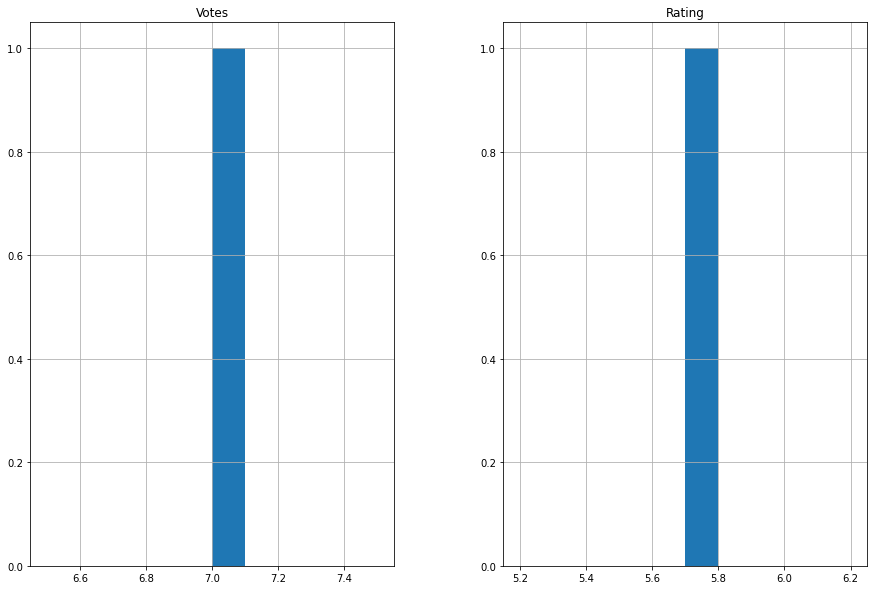

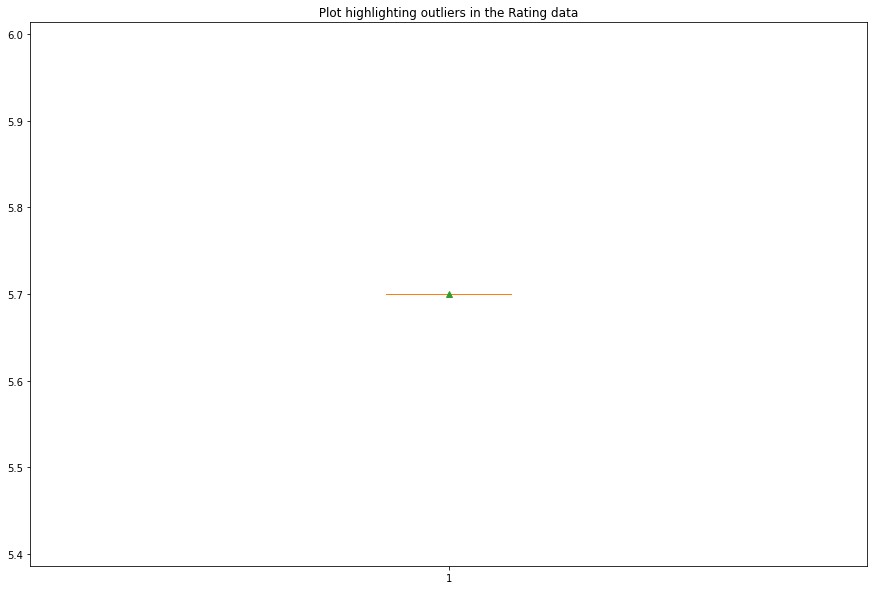

---------------------- After dropping Outliers----------------------
-----------------------Final Data Points = 1----------------------


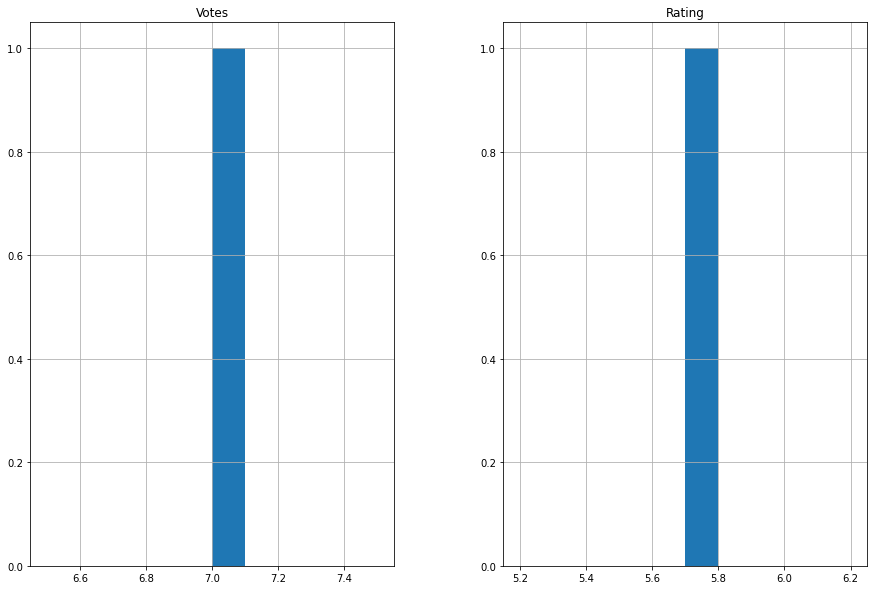

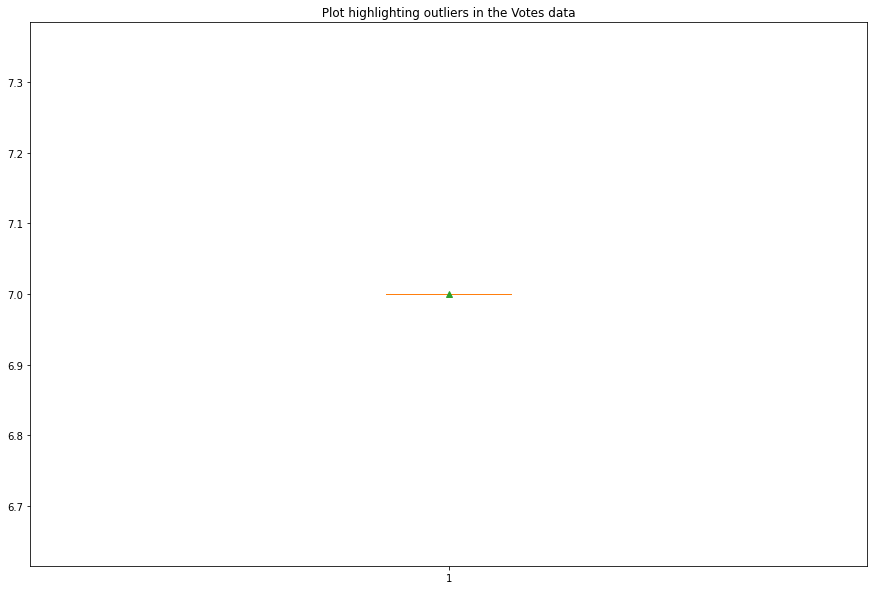

---------------------- After dropping Outliers----------------------
-----------------------Final Data Points = 1----------------------


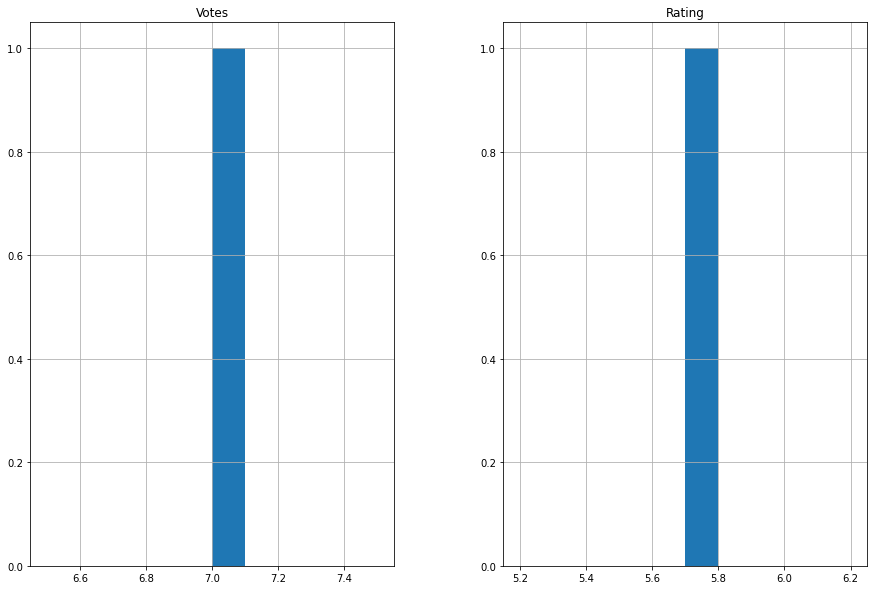

In [56]:
# understanding the Movie Ratings and Votes Data
#Shape of data
movie20_db.hist()

# Identifying and removing Outliers from Ratings
outlier(movie20_db, 'Rating')
outlier(movie20_db, 'Votes')
    
# movie ratings are now somewhat normally distributed  

In [57]:
new_genre = []
for i in movie20_db['Genre']:
    for j in i:
        new_genre.append(j.strip())
    
genre20_list = np.unique(new_genre)
genre20_list.sort()
genre20_list
genre20_df = pd.DataFrame({'Genre':genre20_list})
genre20_df #25 different genre
# row #17 list N/A as a Genre which needs to be removed
genre20_df = genre20_df.drop(index=17)
r_genre20_df = genre19_df.copy()# extra copy
genre20_df

KeyError: '[17] not found in axis'

IndexError: index 0 is out of bounds for axis 0 with size 0

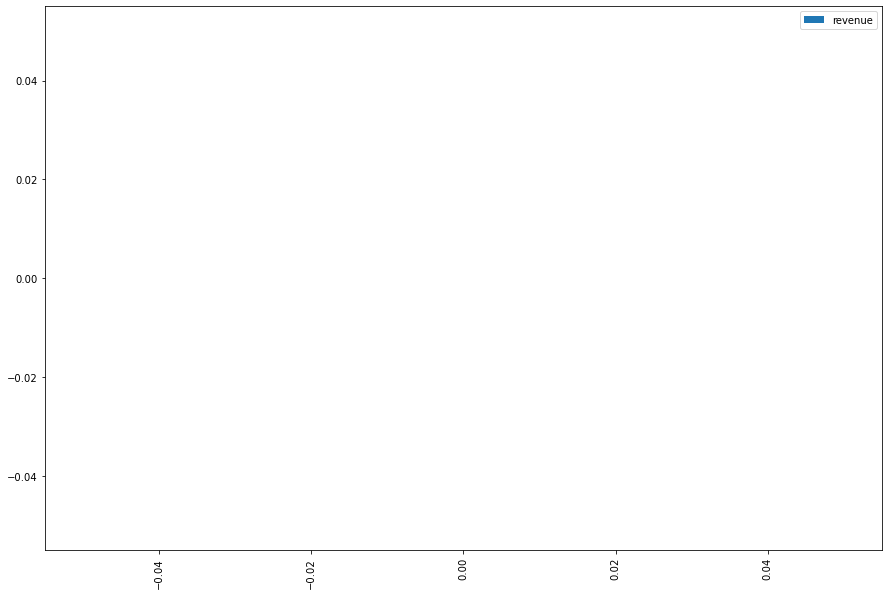

In [58]:
final20_rev_df = genre_revenue(rev20_db,genre20_df)
final20_rev_df
final20_rev_df.drop(index =(final20_rev_df.loc[final20_rev_df['revenue']==0,:]).index, inplace = True) # removing genres which did not have revenue details
final20_rev_df.plot('Genre','revenue',kind = 'bar')# revenue in millions
final20_rev_df

In [ ]:
#identifying the number of movies in each genre
matrix = pd.get_dummies((movie20_db['Genre'].apply(pd.Series).stack()).str.strip()).sum(level = 0)
# matrix.drop(columns = 'N/A', inplace = True)
total20 = pd.DataFrame(matrix.sum())
total20['Genre']= total20.index
total20.set_index(np.arange(len(total20)))
total20.rename(columns = {0: 'Number'}, inplace = True)
total20.plot('Genre','Number', color = bluecolors, kind = 'bar')
plt.show()


In [ ]:
rating_votes(movie20_db, genre20_df)
r_genre20_df = genre20_df

In [ ]:
#dropping empty genre Musical, Mystery, News, Sci-Fi, Sport, War, Western
genre20_df.drop(index=genre20_df.loc[genre20_df['Votes'] ==0,:].index, inplace = True)


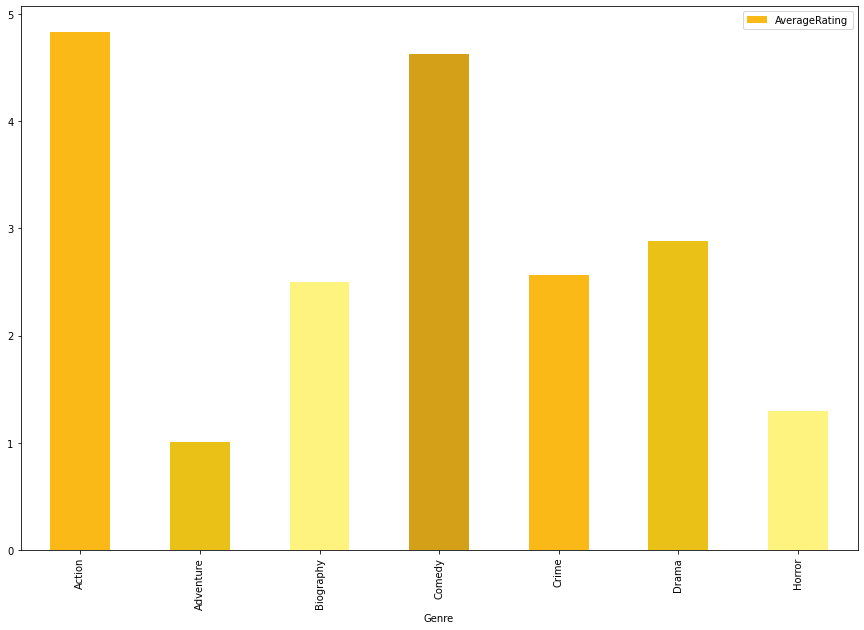

In [43]:
new_genre20 = pd.merge(r_genre20_df,total20,how='inner',on ='Genre')
new_genre20['AverageRating']= new_genre20['Rating']/new_genre20['Number']
new_genre20.plot('Genre','AverageRating' , color = orangecolors, kind = 'bar')
plt.show()


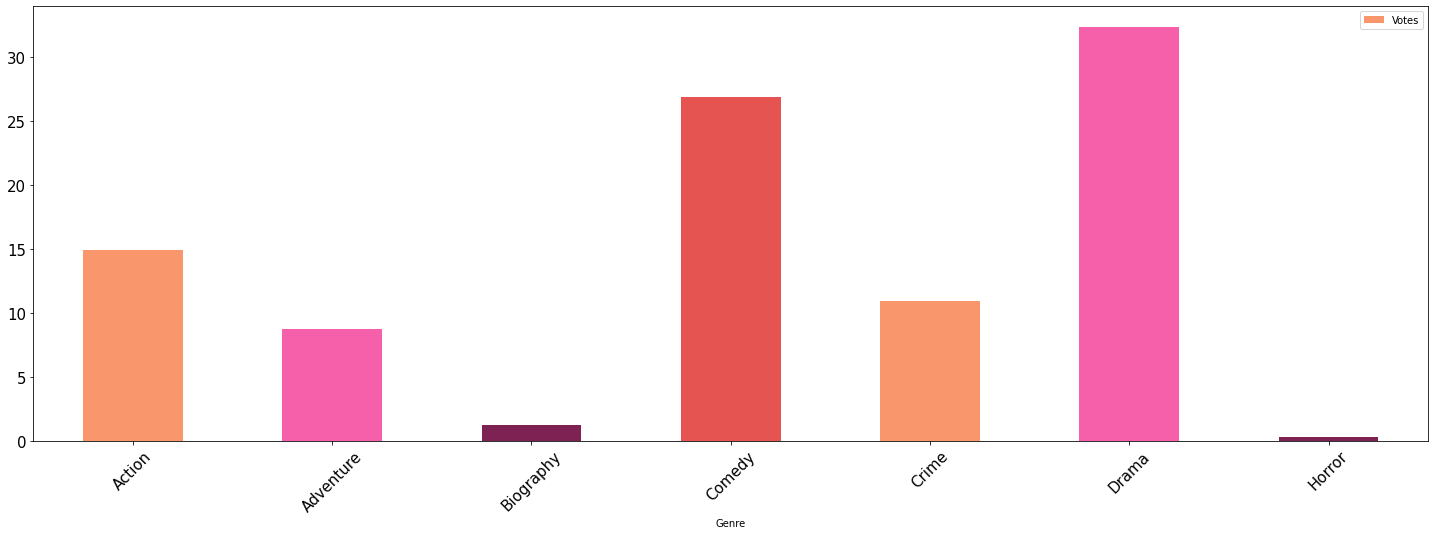

In [44]:
# Genre VS Votes Plot - 2020
new_genre20.plot('Genre', 'Votes', rot = 45, kind = 'bar', color = purplecolors, figsize = (25,8), fontsize = 15)
plt.show()

<AxesSubplot:xlabel='Genre'>

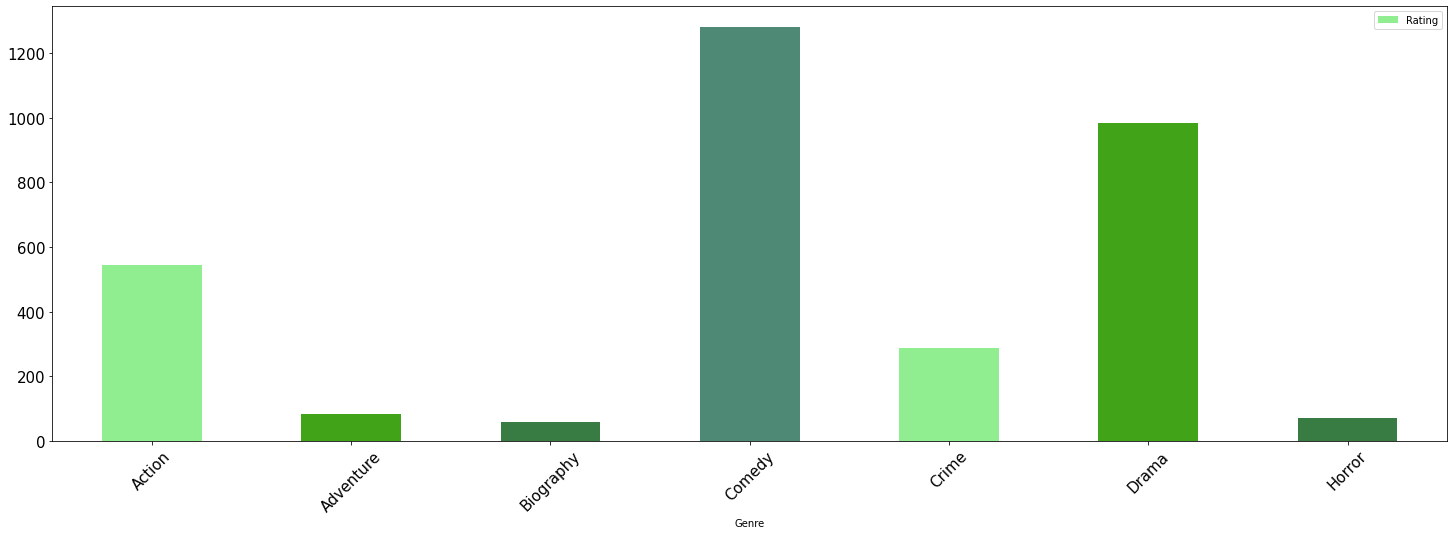

In [45]:
# Genre VS Rating Plot - 2020
new_genre20.plot('Genre', 'Rating', rot = 45, kind = 'bar', color = greencolors, figsize = (25,8), fontsize = 15)

r is 0.9298410722654328 and p is 0.0024106810230691213


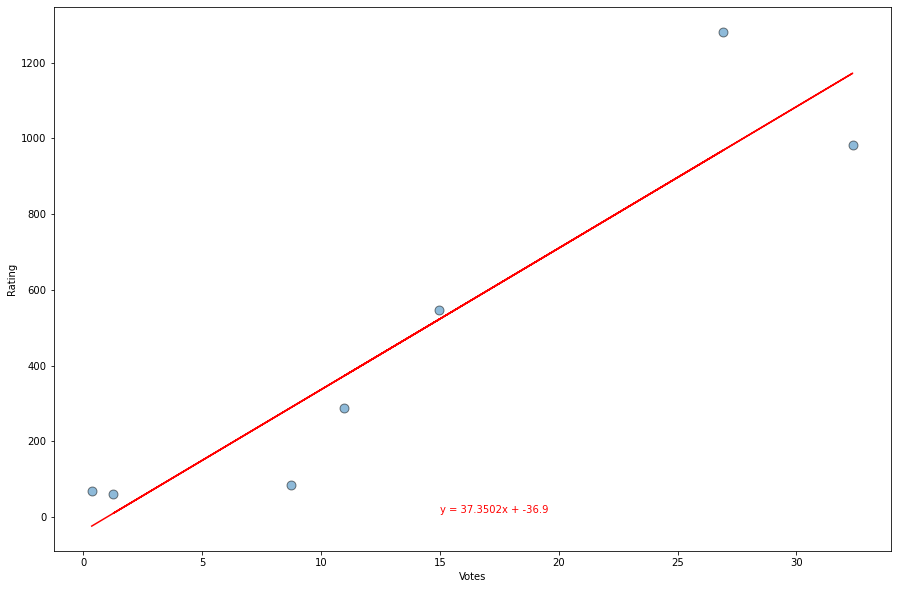

In [46]:

new_genre20.plot('Votes','Rating', alpha = 0.5, edgecolor = 'black', s = 80, kind = 'scatter', figsize = (15,10), fontsize = 10)
x = new_genre20['Votes']
y = new_genre20['Rating']
nx = 15
ny = 10
regress(x,y, nx, ny)

In [47]:
# t test means of ratings  2019 & 2020 

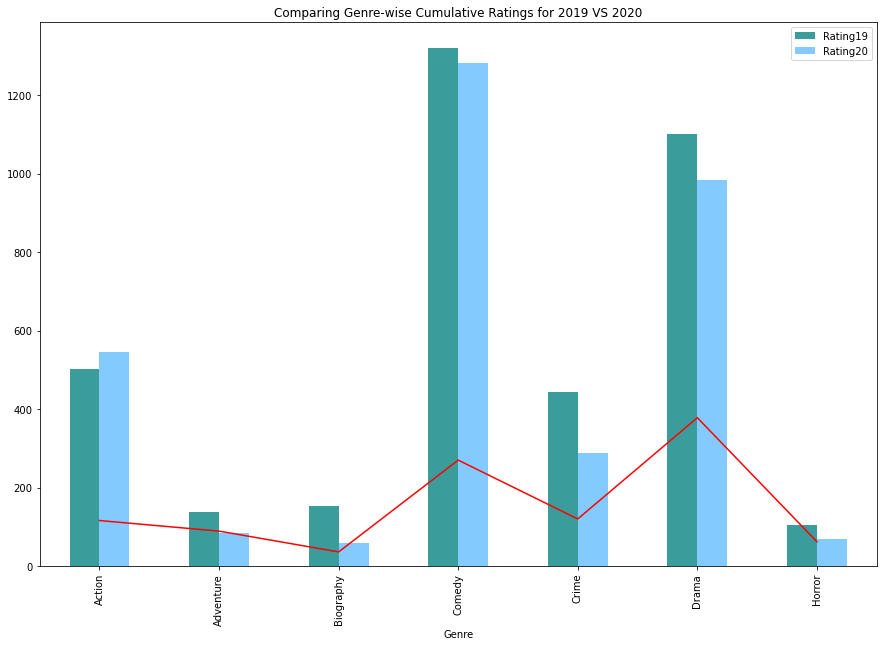

In [48]:
# Comparison graphs
output = pd.merge(new_genre19,new_genre20, how = 'outer', on = ['Genre'])
output.dropna(inplace = True)
r_output = pd.DataFrame({'Genre':output['Genre'],'Rating19': output['Rating_x'],'Rating20': output['Rating_y']})
r_output.plot(x = 'Genre', kind = 'bar',color = bluecolors)

plt.plot(output['Genre'], output['Number_x'], c='r') # line showing the total number of movies in that Genre - Comedy is the clear winner in terms of Ratings

plt.title('Comparing Genre-wise Cumulative Ratings for 2019 VS 2020')
plt.show()

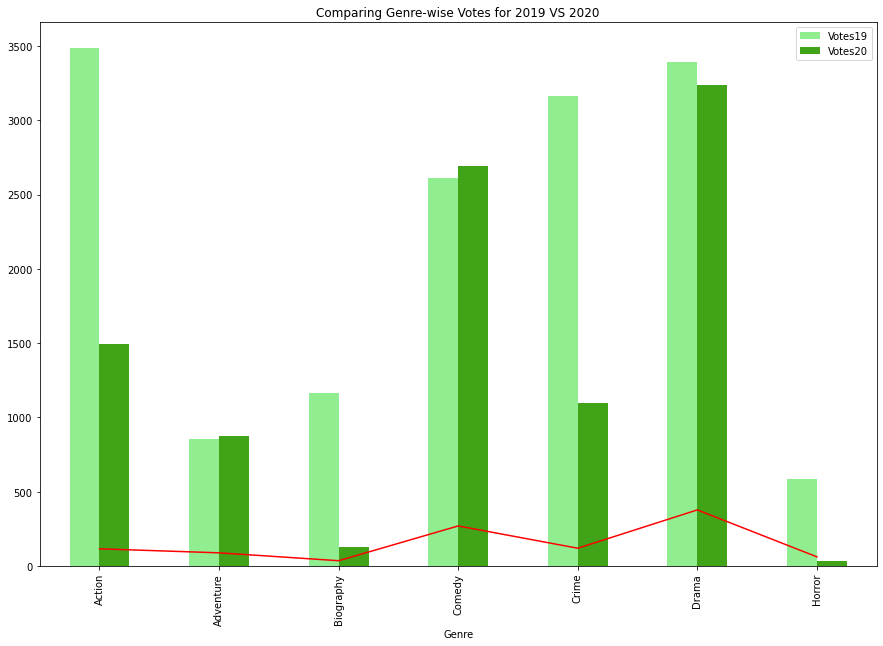

In [49]:
v_output = pd.DataFrame({'Genre':output['Genre'],'Votes19': output['Votes_x']*100,'Votes20': output['Votes_y']*100})
v_output.plot(x = 'Genre', kind = 'bar', color = greencolors)
plt.plot(output['Genre'], output['Number_x'], c = 'r') # line showing the total number of movies in that Genre
plt.title('Comparing Genre-wise Votes for 2019 VS 2020')
plt.show()

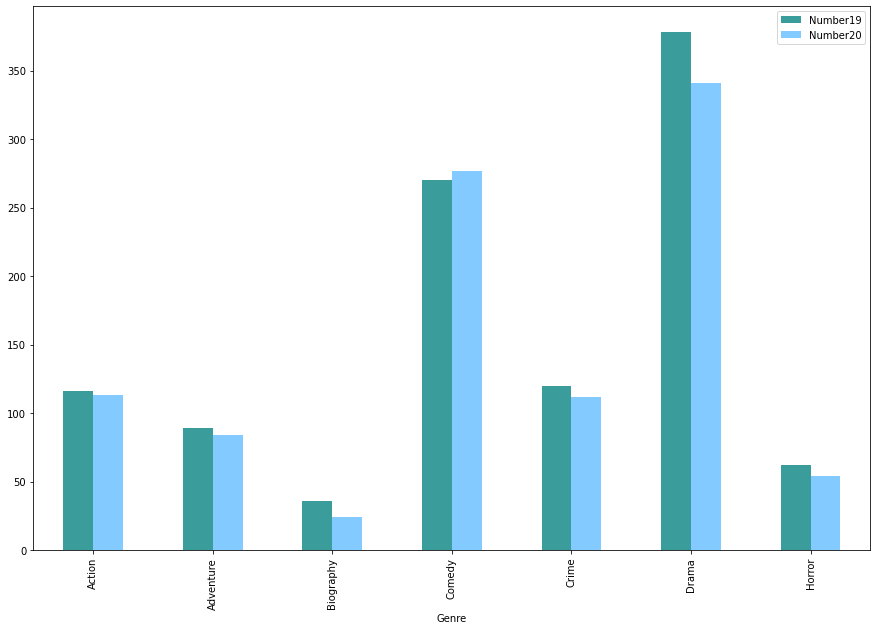

In [50]:

n_output = pd.DataFrame({'Genre':output['Genre'],'Number19': output['Number_x'],'Number20': output['Number_y']})

n_output.plot(x = 'Genre', kind = 'bar',color = bluecolors)
plt.show()
# # r_output = pd.DataFrame({'Genre':output['Genre'],'Rating19': output['Rating_x'],'Rating20': output['Rating_y']})
# # r_output.plot(x = 'Genre', kind = 'bar')


# plt.plot(output['Genre'], output['Number_x'], c = 'r') # line showing the total number of movies in that Genre - Comedy is the clear winner in terms of Ratings

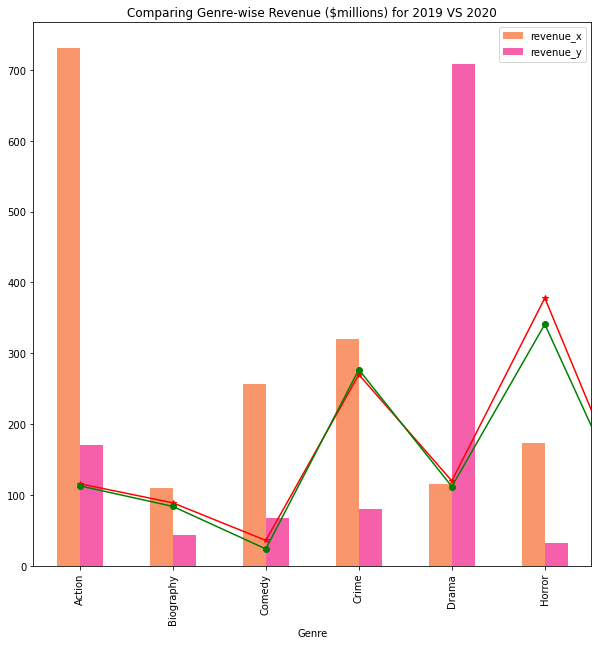

In [51]:
rev_out = pd.merge(final19_rev_df, final20_rev_df , how = 'inner', on='Genre')
rev_out.drop(columns = ['Votes','Rating'],axis = 1, inplace = True)
rev_out.plot('Genre' , kind = 'bar', figsize = (10,10), color = purplecolors)
plt.plot(output['Genre'], output['Number_x'], c = 'r', marker = '*') # line showing the total number of movies in that Genre - Comedy is the clear winner in terms of Ratings
plt.plot(output['Genre'], output['Number_y'], c = 'g',marker = 'o') # line showing the total number of movies in that Genre - Comedy is the clear winner in terms of Ratings
plt.title('Comparing Genre-wise Revenue ($millions) for 2019 VS 2020')
plt.show()

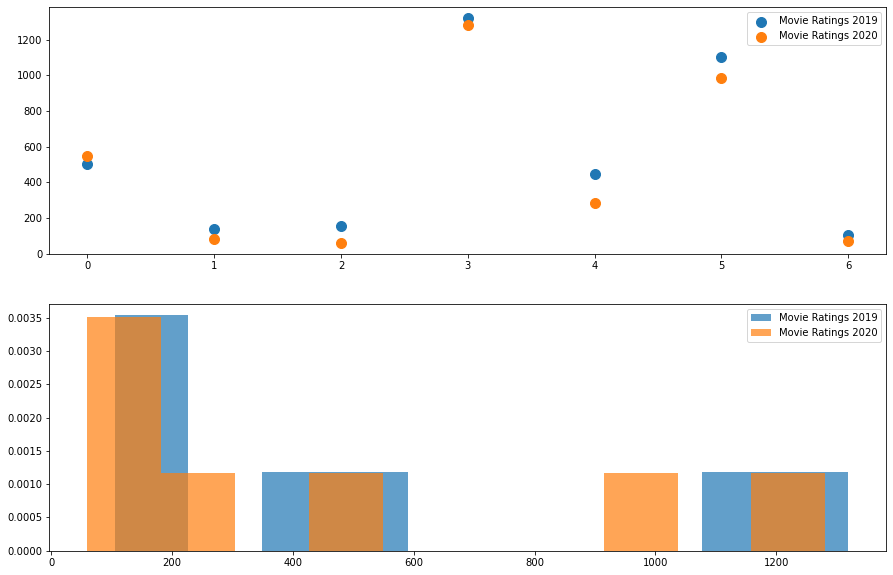

Ttest_indResult(statistic=0.24780442414604753, pvalue=0.8084751652748016)

In [52]:
    # Statistically comparing the data of 2019 and 2020 using independent t-test
    
    
    #Comparing Movie Ratings of 2019 VS 2020
    
    population1 = output['Rating_x']
    population2 = output['Rating_y']
        # Scatter Plot of Data
    plt.subplot(2, 1, 1)
    plt.scatter(range(len(population1)), population1, s= 100, label="Movie Ratings 2019")
    plt.scatter(range(len(population2)), population2, s= 100, label="Movie Ratings 2020")
    plt.legend()
    
    plt.subplot(2, 1, 2)
    plt.hist(population1, 10, density=True, alpha=0.7, label="Movie Ratings 2019")
    plt.hist(population2, 10, density=True, alpha=0.7, label="Movie Ratings 2020")
    plt.legend()  
    plt.show()
    st.ttest_ind(population1, population2, equal_var=False)

#### As the p value >0.05 we will conclude that there is no difference in the Rating Trends of 2019 VS 2020

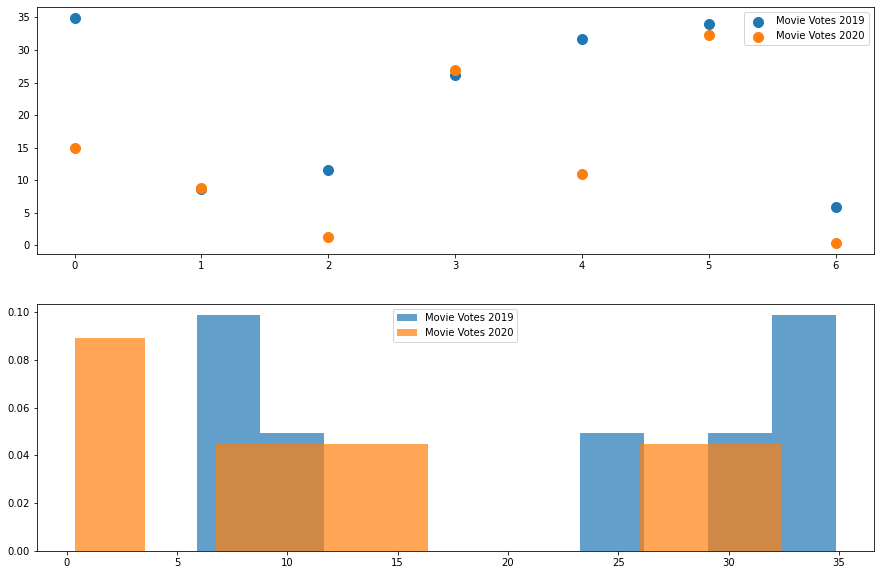

Ttest_indResult(statistic=1.2265058652698402, pvalue=0.2435674811933362)

In [53]:
    # Statistically comparing the data of 2019 and 2020 using independent t-test
    
    
    #Comparing Movie Ratings of 2019 VS 2020
    population1 = output['Votes_x']
    population2 = output['Votes_y']
        # Scatter Plot of Data
    plt.subplot(2, 1, 1)
    plt.scatter(range(len(population1)), population1, s= 100, label="Movie Votes 2019")
    plt.scatter(range(len(population2)),  population2,s= 100, label="Movie Votes 2020")
    plt.legend()
    
    plt.subplot(2, 1, 2)
    plt.hist(population1, 10, density=True, alpha=0.7, label="Movie Votes 2019")
    plt.hist(population2, 10, density=True, alpha=0.7, label="Movie Votes 2020")
    plt.legend()  
    plt.show()
    
    st.ttest_ind(population1, population2, equal_var=False)

### the p-value >0.05 hence the trends in the number of movies,we conclude there is no difference berween the voting/viewing trends of 2019 VS 2020


In [54]:
# Interesting Facts

# most watched movie of 2019
print('Fun facts of 2019')
most_watched_movie19 = movie19_db.loc[movie19_db['Votes'] == max(movie19_db['Votes']), 'Title']
least_watched_movie19 = movie19_db.loc[movie19_db['Votes'] == min(movie19_db['Votes']), 'Title']
highest_rate_movie19 = movie19_db.loc[movie19_db['Rating'] == max(movie19_db['Rating']), 'Title']
Lowest_rate_movie19 = movie19_db.loc[movie19_db['Rating'] == min(movie19_db['Rating']), 'Title']
max_num19 = total19.loc[total19['Number']==max(total19['Number']),:]
min_num19 = total19.loc[total19['Number']==min(total19['Number']),:]
rev19_max = genre19_df.loc[genre19_df['revenue']==max(genre19_df['revenue']), :]
rev19_min = genre19_df.loc[genre19_df['revenue']==min(genre19_df['revenue']), :]

print('Most Watched Movie of 2019 :-  ', most_watched_movie19.values[0] )
print('Least Watched Movie of 2019 :- ', least_watched_movie19.values[0] )
print('Highest Rated Movie of 2019 :- ', highest_rate_movie19.values[0] )
print('Lowest Rated Movie of 2019 :- ', Lowest_rate_movie19.values[0] )
print('Genre with Maximum movie 2019 :-', max_num19.values[0][0] )
print('Genre with Maximum movie 2019 :-', min_num19.values[0][0] )
print('Genre with Maximum Revenue 2019 ($ million) :-', rev19_max.values[0][0])
print('Genre with Minimum Revenue 2019 ($million) :-', rev19_min.values[0][0])

Fun facts of 2019
Most Watched Movie of 2019 :-   Stranger Things
Least Watched Movie of 2019 :-  Hire a Woman
Highest Rated Movie of 2019 :-  Our Planet
Lowest Rated Movie of 2019 :-  5Gang
Genre with Maximum movie 2019 :- 378
Genre with Maximum movie 2019 :- 2
Genre with Maximum Revenue 2019 ($ million) :- Action
Genre with Minimum Revenue 2019 ($million) :- Music


In [57]:
print('Fun facts of 2020')
most_watched_movie20 = movie20_db.loc[movie20_db['Votes'] == max(movie20_db['Votes']), 'Title']
least_watched_movie20 = movie20_db.loc[movie20_db['Votes'] == min(movie20_db['Votes']), 'Title']
highest_rate_movie20 = movie20_db.loc[movie20_db['Rating'] == max(movie20_db['Rating']), 'Title']
Lowest_rate_movie20 = movie20_db.loc[movie20_db['Rating'] == min(movie20_db['Rating']), 'Title']
total20.loc[total20['Number']==max(total20['Number']),:]
total20.loc[total20['Number']==min(total20['Number']),:]
genre20_df.loc[genre20_df['revenue']==max(genre20_df['revenue']), :]
genre20_df.loc[genre20_df['revenue']==min(genre20_df['revenue']), :]
max_num20 = total20.loc[total20['Number']==max(total20['Number']),:]
min_num20 = total20.loc[total20['Number']==min(total20['Number']),:]
rev20_max = genre20_df.loc[genre20_df['revenue']==max(genre20_df['revenue']), :]
rev20_min = genre20_df.loc[genre20_df['revenue']==min(genre20_df['revenue']), :]


print('Most Watched Movie of 2020 :-  ', most_watched_movie20.values[0] )
print('Least Watched Movie of 2020 :- ', least_watched_movie20.values[0] )
print('Highest Rated Movie of 2020 :- ', highest_rate_movie20.values[0] )
print('Lowest Rated Movie of 2020 :- ', Lowest_rate_movie20.values[0] )
print('Genre with Maximum movie 2020 :-', max_num20.values[0][0] )
print('Genre with Maximum movie 2020 :-', min_num20.values[0][0] )
print('Genre with Maximum Revenue 2020 ($ million) :-', rev20_max.values[0][0])
print('Genre with Minimum Revenue 2020 ($million) :-', rev20_min.values[0][0])

Fun facts of 2020
Most Watched Movie of 2020 :-   Tigertail
Least Watched Movie of 2020 :-  Accomplice
Highest Rated Movie of 2020 :-  The Healing Powers of Dude
Lowest Rated Movie of 2020 :-  The Life Ahead
Genre with Maximum movie 2020 :- 341
Genre with Maximum movie 2020 :- 1
Genre with Maximum Revenue 2020 ($ million) :- Drama
Genre with Minimum Revenue 2020 ($million) :- Horror
